<a href="https://colab.research.google.com/github/AsmaaElbadry/Student_Performance/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### dataset link: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
performance_df= pd.read_csv('dataset/Student_Performance.csv')
performance_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
performance_df.duplicated().sum()

127

In [ ]:
performance_df.drop_duplicates(inplace= True)

In [ ]:
performance_df.duplicated().sum()

0

In [ ]:
performance_df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
label_en= LabelEncoder()
performance_df['Encoded Extracurricular Activities']= label_en.fit_transform(performance_df['Extracurricular Activities'])
performance_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Encoded Extracurricular Activities
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0


In [ ]:
performance_df.drop('Extracurricular Activities', axis= 1, inplace= True)
performance_df.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Encoded Extracurricular Activities
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


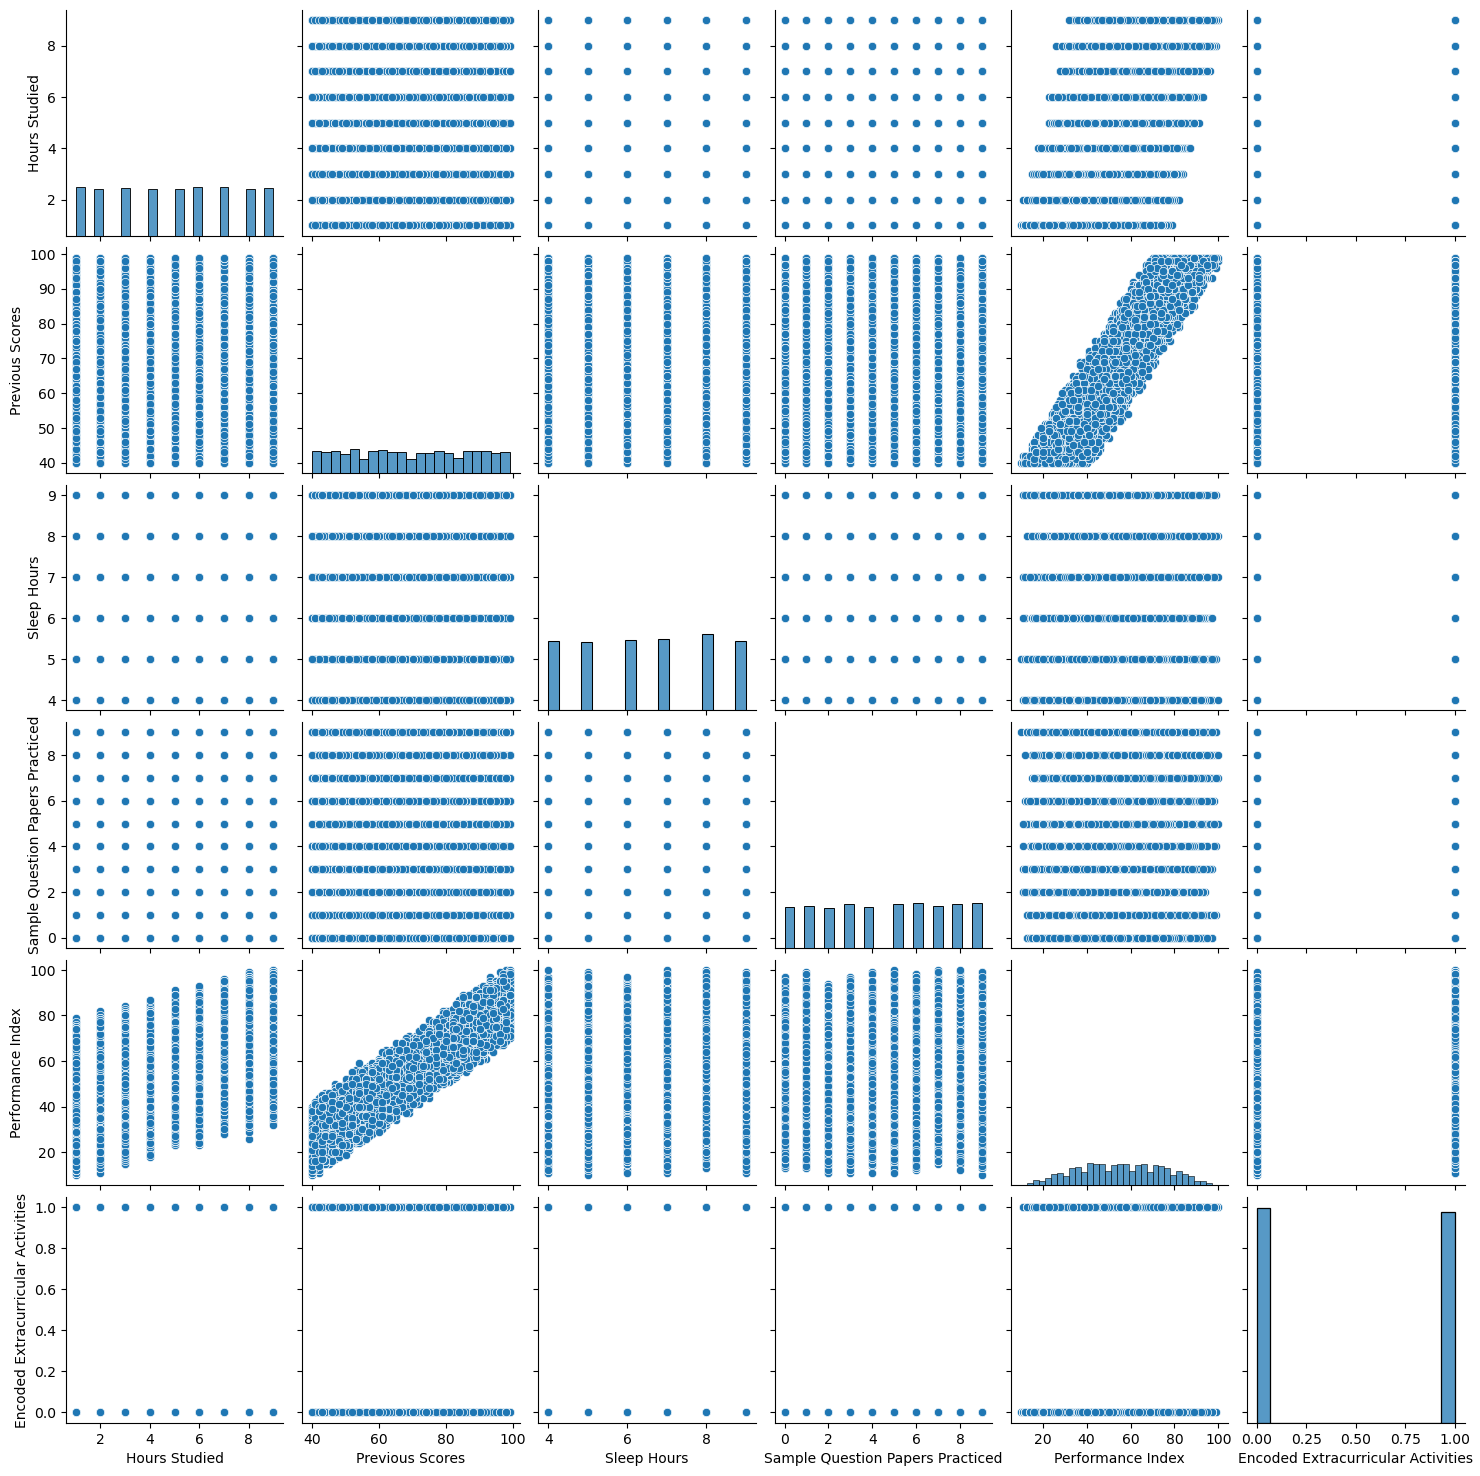

In [ ]:
sns.pairplot(performance_df)
plt.show()

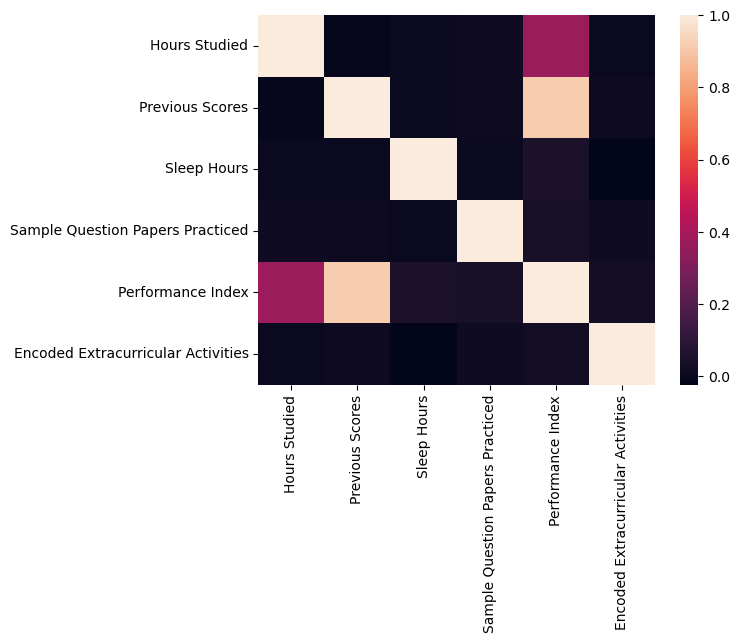

In [ ]:
sns.heatmap(performance_df.corr())
plt.show()

In [ ]:
x= performance_df.drop('Performance Index', axis= 1)
x.head(2)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Encoded Extracurricular Activities
0,7,99,9,1,1
1,4,82,4,2,0


In [ ]:
y= performance_df['Performance Index'].values
y

array([91., 65., 45., ..., 74., 95., 64.])

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.2, random_state= 10)

In [ ]:
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred= lr.predict(x_test)
y_pred

array([76.03369213, 55.99329579, 71.67051978, ..., 61.86895738,
       38.54936853, 61.03215061])

In [ ]:
lr.score(x_test, y_test)

0.988543367387248